# Домашнее задание к лекции «Задачи классификации и кластеризации»

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# настройка цветовой гаммы визуализации

cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
# Загружаем набор данных Ирисы:

iris = datasets.load_iris()

In [4]:
# Смотрим на названия переменных

print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print (iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
# Смотрим на целевую переменную

print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
# Для удобства делаем DataFrame
# Делаем имена колонок такие же, как имена переменных

iris_frame = pd.DataFrame(iris.data, columns=iris.feature_names)

In [9]:
# Добавляем столбец с целевой переменной
iris_frame['target'] = iris.target
iris_target = iris.target

In [10]:
# Смотрим, что получилось
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
# разделяем выборку на тренировочную и тестовую

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_frame, iris_target, test_size=0.25)

In [12]:
# импортируем LDA-функционал

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
lda = LinearDiscriminantAnalysis()

In [14]:
# обучаем данные

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [15]:
# делаем прогноз на тестовой выборке

lda.predict(X_test)

array([2, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2])

In [16]:
# смотрим разницу факта и прогноза

result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,2
1,1,2
2,1,1
3,2,2
4,0,0
5,1,1
6,2,2
7,0,0
8,1,1
9,1,1


In [17]:
# расчет точности - отношение верный прогнозов к общему количеству позиций

from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, lda.predict(X_test))

0.9736842105263158

In [19]:
# коэффициенты дискриминатных линий
lda.coef_

array([[  7.19282533,  10.61182001, -15.03154704, -21.70251825,
          0.        ],
       [ -1.86859313,  -3.72381785,   4.48725168,   2.91793872,
          0.        ],
       [ -5.57418291,  -7.05767083,  10.9467624 ,  20.09875553,
          0.        ]])

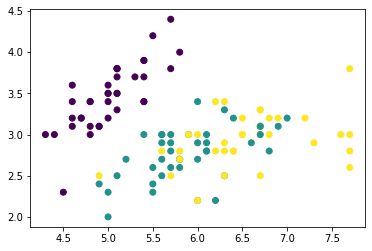

In [21]:
# визуализируем дискриминантную линию только по 2 признакам

plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [22]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

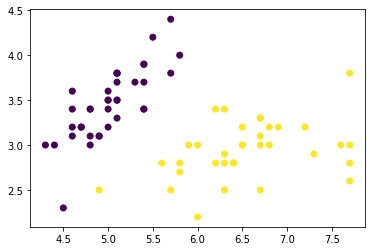

In [23]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [24]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [25]:
# посмотрим на наши центроиды
lda_small.means_

array([[5.01891892, 3.46216216],
       [6.54411765, 2.94117647]])

<ipython-input-27-f28b672bf64f>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


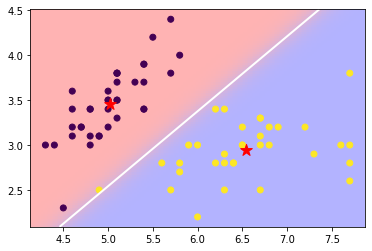

In [27]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [28]:
lda_small.coef_

array([[  9.16497946, -10.98756503]])

In [29]:
# точность модели

accuracy_score(sy_test, lda_small.predict(small_test))

1.0

#  Кластерный анализ

In [31]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_scaled = scaler.fit_transform(iris_frame)

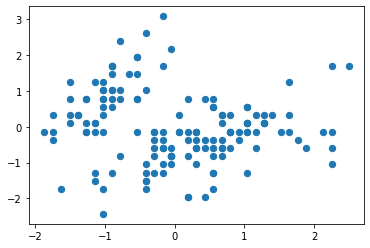

In [34]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=40)

In [35]:
from sklearn.cluster import KMeans

In [36]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

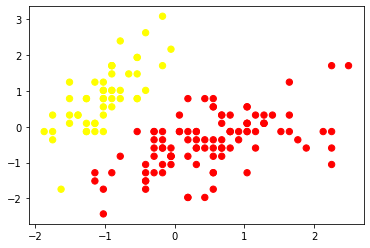

In [38]:
plt.scatter(X_scaled[:, 0] ,X_scaled[:, 1],cmap='autumn', c=clusters, s=40)

In [ ]:
# Визуализация Иерархической кластеризации (для себя)

In [40]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

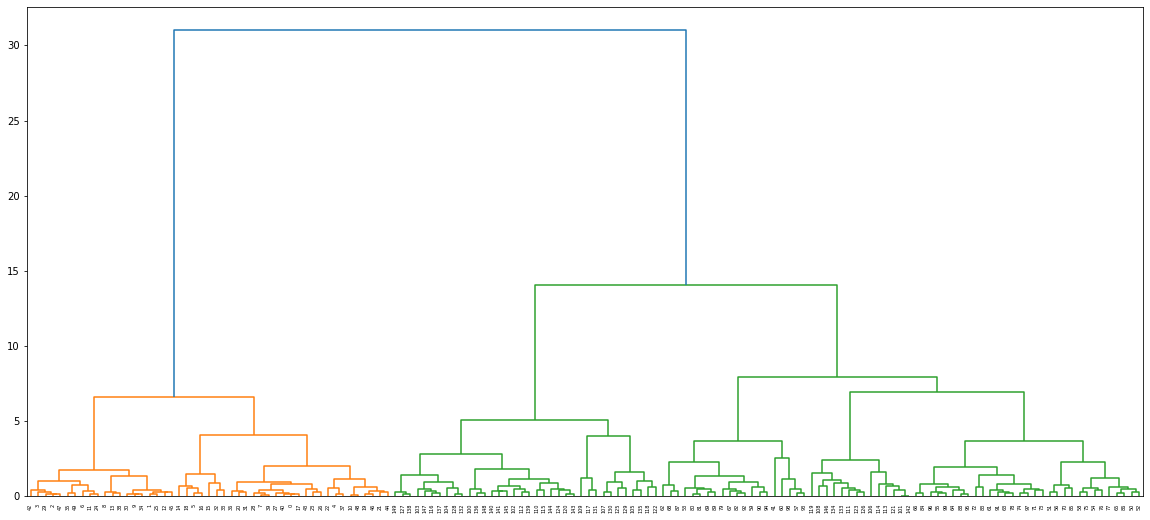

In [41]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация аг ломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)